# CE - 652
## Artificial Intelligence for Autonomous Driving
## Application Assigments 
##### Week: 1
##### Instructor: Dr. Juan D. Gomez
Related Videos: [The Graph that learns](https://youtu.be/bqi8TLuS6rk) / [The Perceptron](https://youtu.be/hHlm9wDTPHI)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image

# 1.  PERCEPTRON:
This Perceptron has to be trained to learn the '& problem': 1 & 1 = 1,  1 & 0 = 0,  0 & 1 = 1,  0 & 0 = 1


## The first step is to define the hardlim function:

In [2]:
def hardlim(x):
    #Yor code here 
    return 1*(x >= 0)  #Much easier than I had below... :)
    
    
    #If dealing with a single dot product value
    #try:
    #    if x >= 0:
    #        return np.array([1])
    #    else:
    #        return np.array([0])
    ##If dealing with an array from the dot product
    #except:
    #    length = len(x)
    #    res = np.zeros(length)
    #    cnt = 0
    #    
    #    for i in x:
    #        if i >= 0:
    #            res[cnt] = 1
    #        else:
    #            res[cnt] = 0
    #        cnt = cnt + 1
    #    return res
    #End Add Code-----------------------------------------

## Next we have to define our matrix of patterns P:

In [3]:
P=np.array([[1, 0, 0, 1 ],
            [1, 0, 1, 0 ],
            [1, 1, 1, 1 ]])

NOTICE that each pattern is represented as a column in P and although our patterns are bi-dimensional, each column has three components since the third component is just the input of the bias (always 1)

## Now let's define our traget matrix T:

In [4]:
T=np.array( [1, 0, 0, 0 ] )

The targets are 1 for the first column pattern in P and 0 for the rest.

## Let's set our weights W randomly:


In [5]:
W= np.array([0.041, -0.7, 0.075])

This is a 2 input, 1 output network (i.e. one single neuron with two inputs). The vector W of our single vectors however has 3 components because the third one represents the bias. I used this random numbers [0.041, -0.7, 0.075] to initialize but any random numbers will suffice.

## Let's calculate the output of the net:

In [6]:
hardlim(np.dot(W,P[:,0]))

0

This is the output of my sigle neuron network for the first pattern P[:,0]. However, if we want to test the network with all the patterns at once, we can do it like this: 

In [7]:
hardlim(np.dot(W,P))

array([0, 1, 0, 1])

...and the error for all the patterns would be:

In [8]:
T-hardlim(np.dot(W,P))  

array([ 1, -1,  0, -1])

## Now let's plot the patterns (red class 0 and blue class 1), along with the decision line of my network as it this far (not trained):

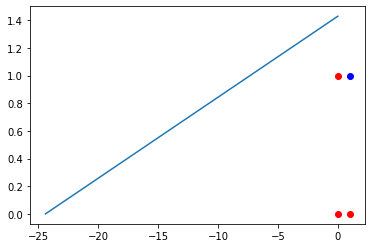

In [9]:
# Your code here to add the decision line to this plot
p1_intercept = -(1/W[0])
p2_intercept = -(1/W[1])
x = [0 , p1_intercept]
y = [p2_intercept, 0]
plt.plot(x, y)
#End Add Code-----------------------------------------
plt.plot([0,0,1],[0,1,0],'ro') 
plt.plot([1],[1],'bo') 
plt.show()

NOTICE that the network is not performing well (as the error shows) just because its desision line has not been adjusted yet (the weights are not fine-tuned). 

## Now, let's train the network (fine-tune its weights):

In [10]:
A=hardlim(np.dot(W,P))  
E=T-A

while sum(E)!=0:
    #Your code here to update W
    length = len(P[0])
    for i in range(length):    
        W[0] = W[0] + (E[i] * P[0][i])
        W[1] = W[1] + (E[i] * P[1][i])
        #W[2] = W[2] + (E[i] * P[2][i])
    #End Add Code-----------------------------------------
    A=hardlim(np.dot(W,P))
    E=T-A


## After training let's plot again to see how the decision line was ajusted (weights fine-tuned) so the network now solves the problem flawlessly:

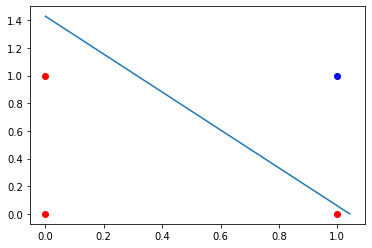

In [11]:
# Your code here to add the decision line to this plot
p1_intercept = -(1/W[0])
p2_intercept = -(1/W[1])
x = [0 , p1_intercept]
y = [p2_intercept, 0]
plt.plot(x, y)
#End Add Code-----------------------------------------
plt.plot([0,0,1],[0,1,0],'ro') 
plt.plot([1],[1],'bo') 
plt.show()

# 2. SELF DRIVING:

## Let's first create a function that reads an image and returns its 23x23 binary matrix representation:

In [12]:
def get_matrix(path):
    img = Image.open(path).convert('LA')
    mat=np.zeros((23,23))
    for x in range(23):
        for y in range (23):
            mat[y][x]=img.getpixel((x, y))[0]
            if mat[y][x]!=0:
                mat[y][x]=1
            
    return mat

## Now we can read and print our 3 selfdriving images:

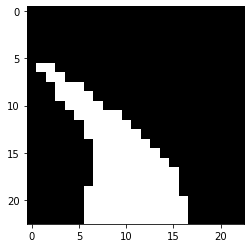

In [13]:
left=get_matrix('Imagen1.png')
plt.imshow(left, cmap="gray")
plt.show()

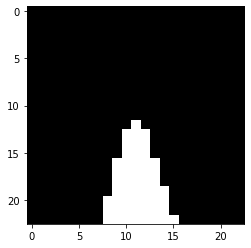

In [14]:
straight=get_matrix('Imagen2.png')
plt.imshow(straight, cmap="gray")
plt.show()

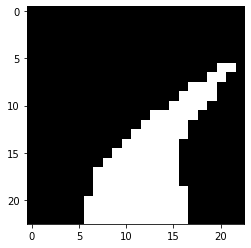

In [15]:
right=get_matrix('Imagen3.png')
plt.imshow(right, cmap="gray")
plt.show()

## This is how one of our images looks like when binarized:

In [16]:
for i in range(23):
    for j in range (23):
        print(int(left[i][j]),end =" ")
    print('\n')

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 

0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 

0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 

## Now using the code of the first point (PERCEPTRON) train a neural network that can "drive a car" based on our 3 images: 
If presented with the image left, it has to respond [1,0]. If presented with the image straight, it has to respond [0,0]. And, finally, if presented with the image right, it has to respond [0,1]

INSTRUCTIONS: This perceptron network has two neurons and 529 (23x23) inputs. The matrix of patterns P is of size 530x3 (530 and not 529, because you have to add, to each of the 3 patterns, one more component=1 for the bias). The W matrix of weights is of size 2x530 (2 neurons of 530 parameters) and has to be set randomly. The target matrix T is the following:

In [17]:
T=np.array([[1, 0, 0 ],
            [0, 0, 1 ]])

You have to reshape the matrixes left, straight and right to form the matrix P (do not forget to add 1 in the end to each reshaped matrix):

In [18]:
# Your code here
P = np.empty((530, 3), dtype=int)

i = 0
for x in range(23):
    for y in range (23):
        P[i][0] = left[x][y]
        i = i+1
P[i][0] = 1 #bias
i = 0
for x in range(23):
    for y in range (23):
        P[i][1] = straight[x][y]
        i = i+1
P[i][1] = 1 #bias
i = 0
for x in range(23):
    for y in range (23):
        P[i][2] = right[x][y]
        i = i+1
P[i][2] = 1 #bias
#End Add Code-----------------------------------------

In [19]:
P.shape

(530, 3)

Set W randomly:

In [20]:
# Your code here
W = np.empty((2, 530))
W[0] = np.random.rand(530)
W[1] = np.random.rand(530)
#for x in range(530):
#    W[0][i] = np.random.rand()
#End Add Code-----------------------------------------

In [21]:
W.shape

(2, 530)

Train in a 'while' loop:

In [22]:
#Your code here 
A=hardlim(np.dot(W[0],P))  
E=T-A
while sum(sum(E)) != 0:
    #Your code here to update W
    length = len(P[0])
    for i in range(length):
        for j in range (530):
            W[0][j] = W[0][j] + (E[0][i] * P[j][i])
            W[1][j] = W[1][j] + (E[1][i] * P[j][i])
    A=hardlim(np.dot(W,P))
    E=T-A
#End Add Code-----------------------------------------

Print the error:

In [23]:
print(sum(sum(E)))

0


Print the actual output of the network after training:

In [24]:
A

array([[1, 0, 0],
       [0, 0, 1]])